# Data Preprocessing

#### Data preprocessing is an essential step in machine learning that involves transforming raw data into a format that can be effectively used by machine learning algorithms. It helps to improve the quality and reliability of the data, reduce noise, and ensure compatibility with the chosen learning algorithm. Data preprocessing encompasses several techniques and tasks, including data cleaning, data normalization, feature selection, and feature scaling.

### 1.Importing the necessary libraries

#### Some of the libraries such as numpy pandas sklearn are used in our code to create the machine learning model. This libraries are neccessary to run our code 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline
import pandas as pd

### Reading dataset

##### Here we are reading our dataset from our current directory. We have saved our dataset in the variable named 'df' . Now we perform data preprocessing techniques on this "df" variable

In [34]:
df = pd.read_csv('framingham.csv')
df.head(20)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      1   39        4.0              0         0.0     0.0                0   
1      0   46        2.0              0         0.0     0.0                0   
2      1   48        1.0              1        20.0     0.0                0   
3      0   61        3.0              1        30.0     0.0                0   
4      0   46        3.0              1        23.0     0.0                0   
5      0   43        2.0              0         0.0     0.0                0   
6      0   63        1.0              0         0.0     0.0                0   
7      0   45        2.0              1        20.0     0.0                0   
8      1   52        1.0              0         0.0     0.0                0   
9      1   43        1.0              1        30.0     0.0                0   
10     0   50        1.0              0         0.0     0.0                0   
11     0   43        2.0              0         0.0     0.0                0   
12     1   46        1.0              1        15.0     0.0                0   
13     0   41        3.0              0         0.0     1.0                0   
14     0   39        2.0              1         9.0     0.0                0   
15     0   38        2.0              1        20.0     0.0                0   
16     1   48        3.0              1        10.0     0.0                0   
17     0   46        2.0              1        20.0     0.0                0   
18     0   38        2.0              1         5.0     0.0                0   
19     1   41        2.0              0         0.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0              0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1              0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2              0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3              1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4              0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5              1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6              0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7              0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8              1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9              1         0    225.0  162.0  107.0  23.61       93.0     88.0   
10             0         0    254.0  133.0   76.0  22.91       75.0     76.0   
11             0         0    247.0  131.0   88.0  27.64       72.0     61.0   
12             1         0    294.0  142.0   94.0  26.31       98.0     64.0   
13             1         0    332.0  124.0   88.0  31.31       65.0     84.0   
14             0         0    226.0  114.0   64.0  22.35       85.0      NaN   
15             1         0    221.0  140.0   90.0  21.35       95.0     70.0   
16             1         0    232.0  138.0   90.0  22.37       64.0     72.0   
17             0         0    291.0  112.0   78.0  23.38       80.0     89.0   
18             0         0    195.0  122.0   84.5  23.24       75.0     78.0   
19             0         0    195.0  139.0   88.0  26.88       85.0     65.0   

    TenYearCHD  
0            0  
1            0  
2            0  
3            1  
4            0  
5            0  
6            1  
7            0  
8            0  
9            0  
10           0  
11           0  
12           0  
13           0  
14           0  
15           1  
16           0  
17           1  
18           0  
19           0

### Checking the number of Rows and columns in data set

##### In Python, the shape attribute of a Pandas DataFrame provides information about the dimensions of the DataFrame. It returns a tuple containing the number of rows and columns in the DataFrame.

In [4]:
df.shape

(4240, 16)

### Checking the Types of the parameters

#### Here we are checking the datatypes of our parameters in the dataset

In [5]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### Checking for any Duplicate Values in the dataset

#### Here we are checking for duplicate values in the dataset 

#### Duplicate values in a dataset can pose challenges in machine learning tasks, as they can bias the training process and affect the accuracy of the models. It's important to identify and handle duplicate values appropriately. Here's an approach to identify and handle duplicates in a dataset:

In [6]:
duplicate_df=df[df.duplicated()]
duplicate_df

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

### Checking for number of NaN values in dataset

#### Dealing with missing values, often represented as NaN (Not a Number), is an important preprocessing step in machine learning. Missing values can occur in datasets due to various reasons, such as incomplete data collection, data corruption, or data transformation processes

In [7]:
df.isna().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Plotting the histogram for showing the distributions of parameters in dataset

C:\Users\durge\AppData\Local\Temp\ipykernel_13012\1093788407.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

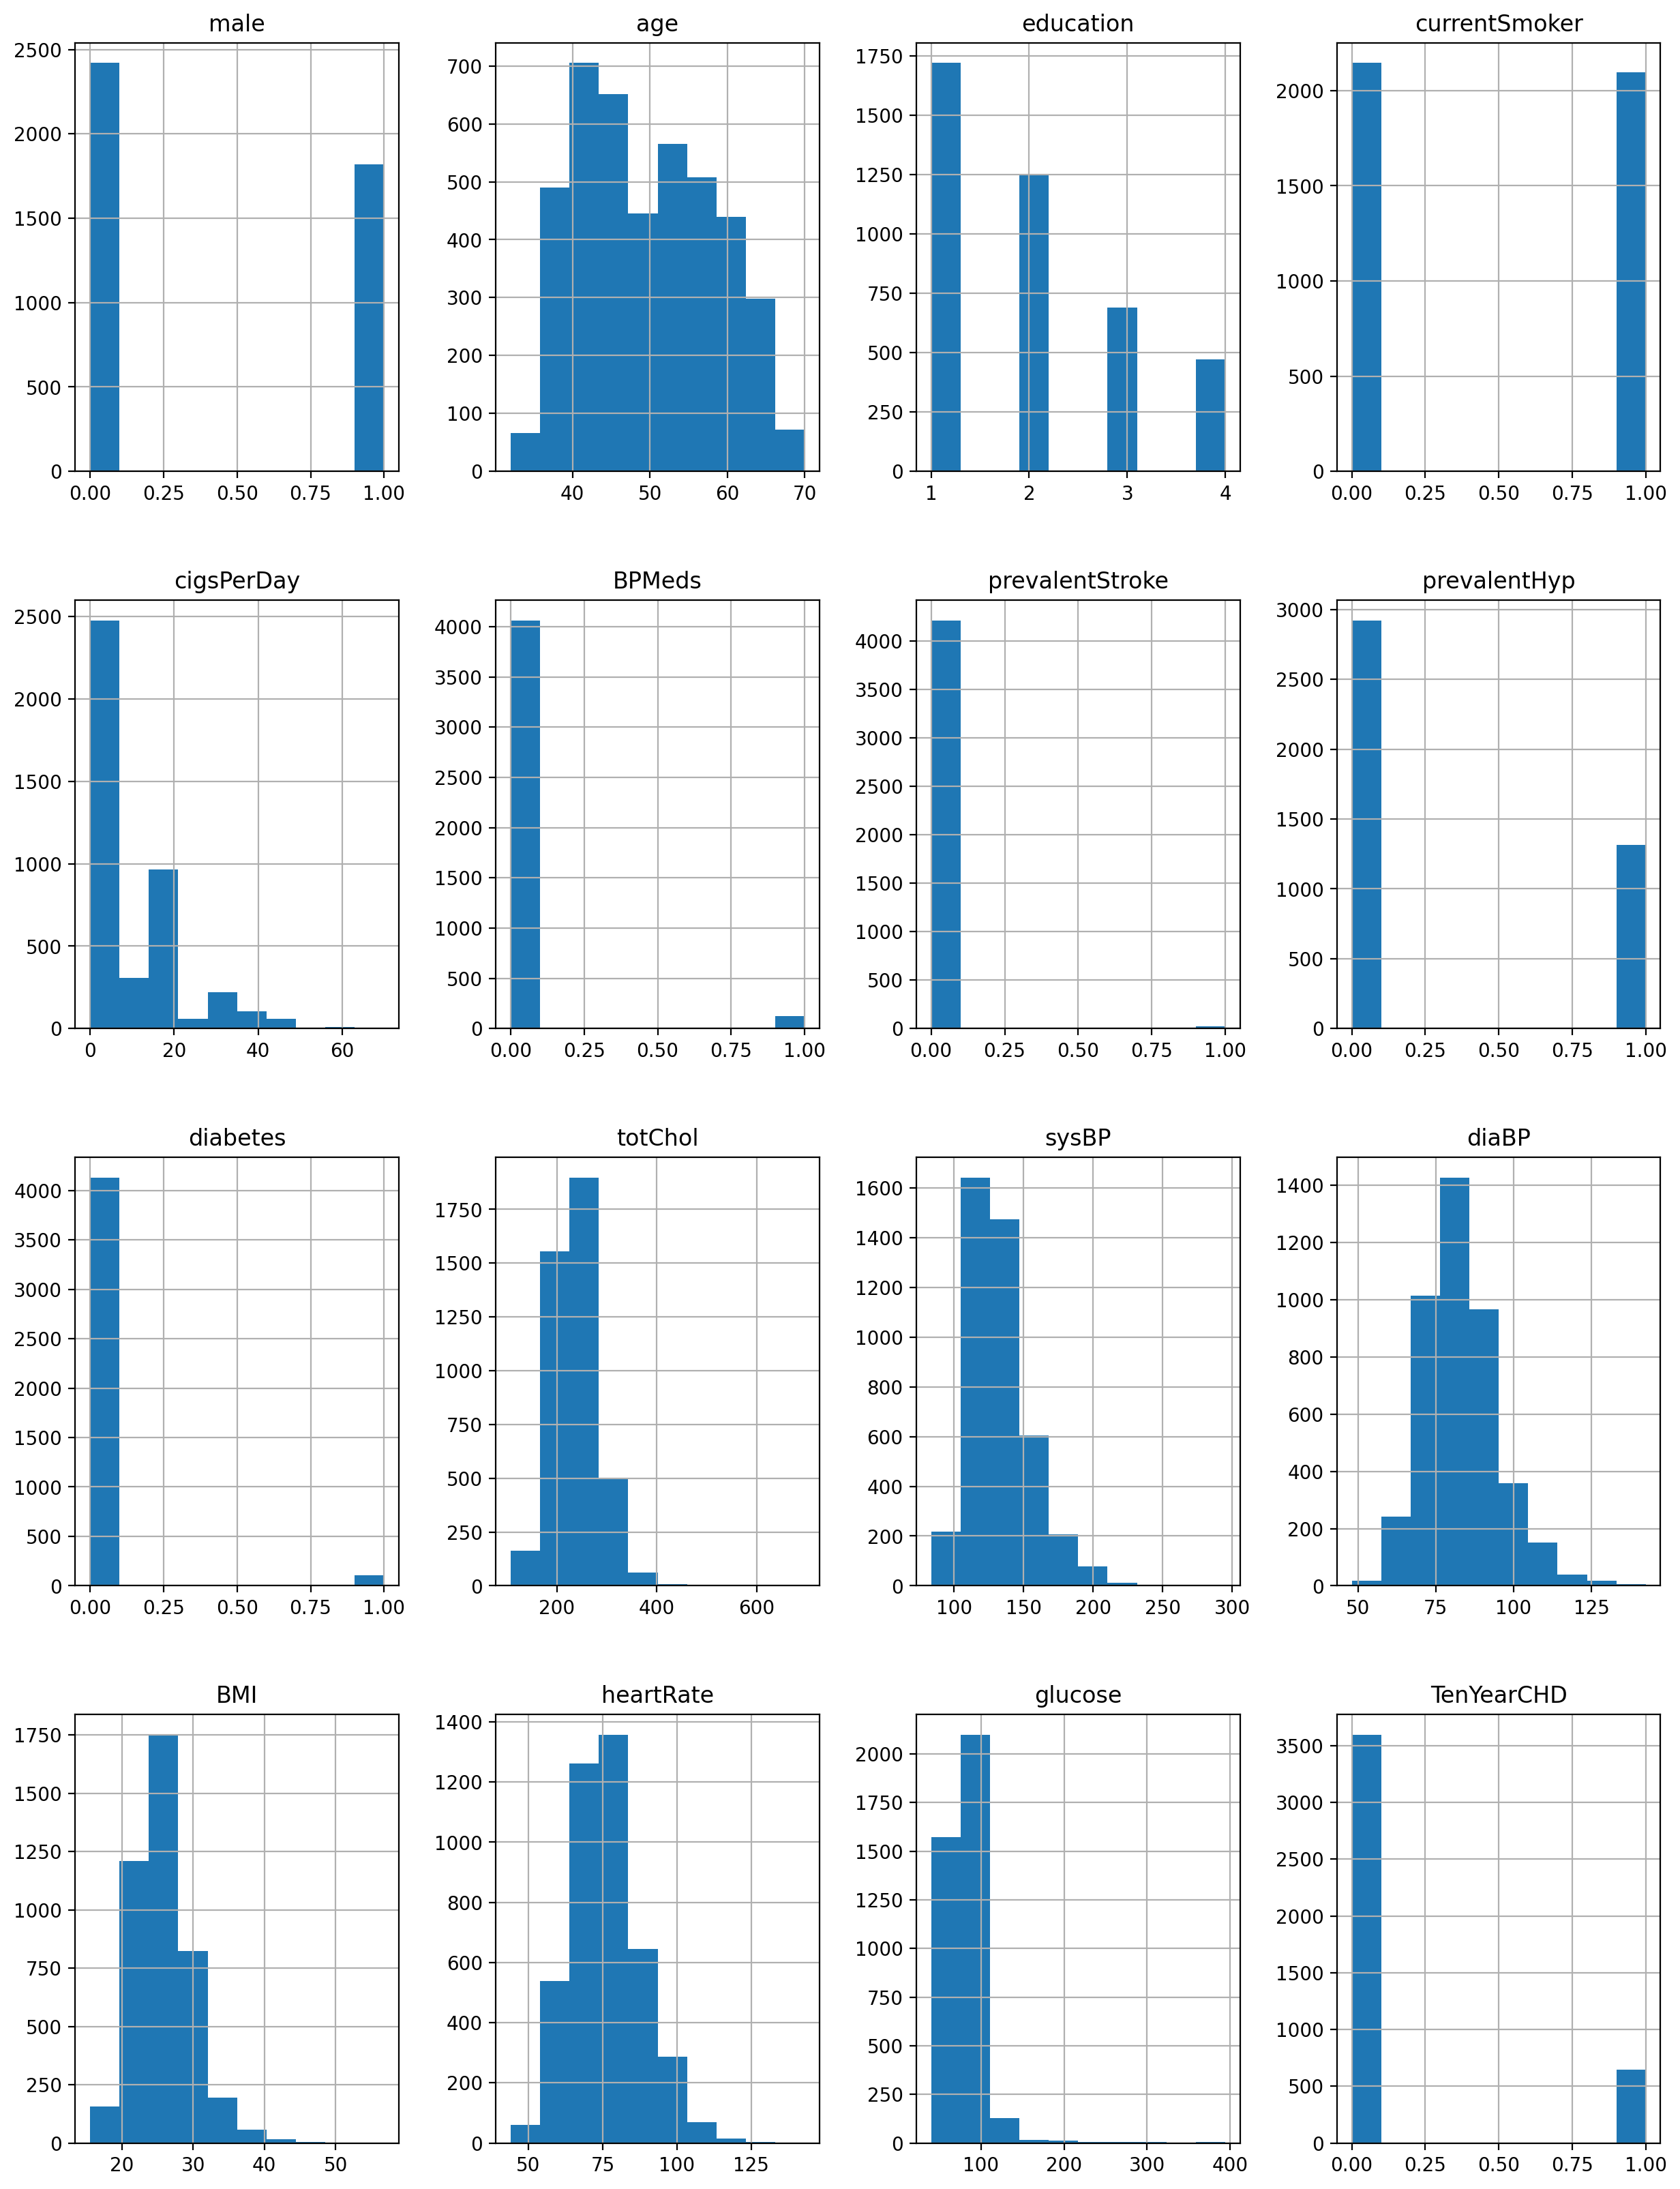

In [8]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

### Checking the Correlation of the paramters with the Target parameters

#### A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data. A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.

<Figure size 1200x900 with 0 Axes>

<Axes: >

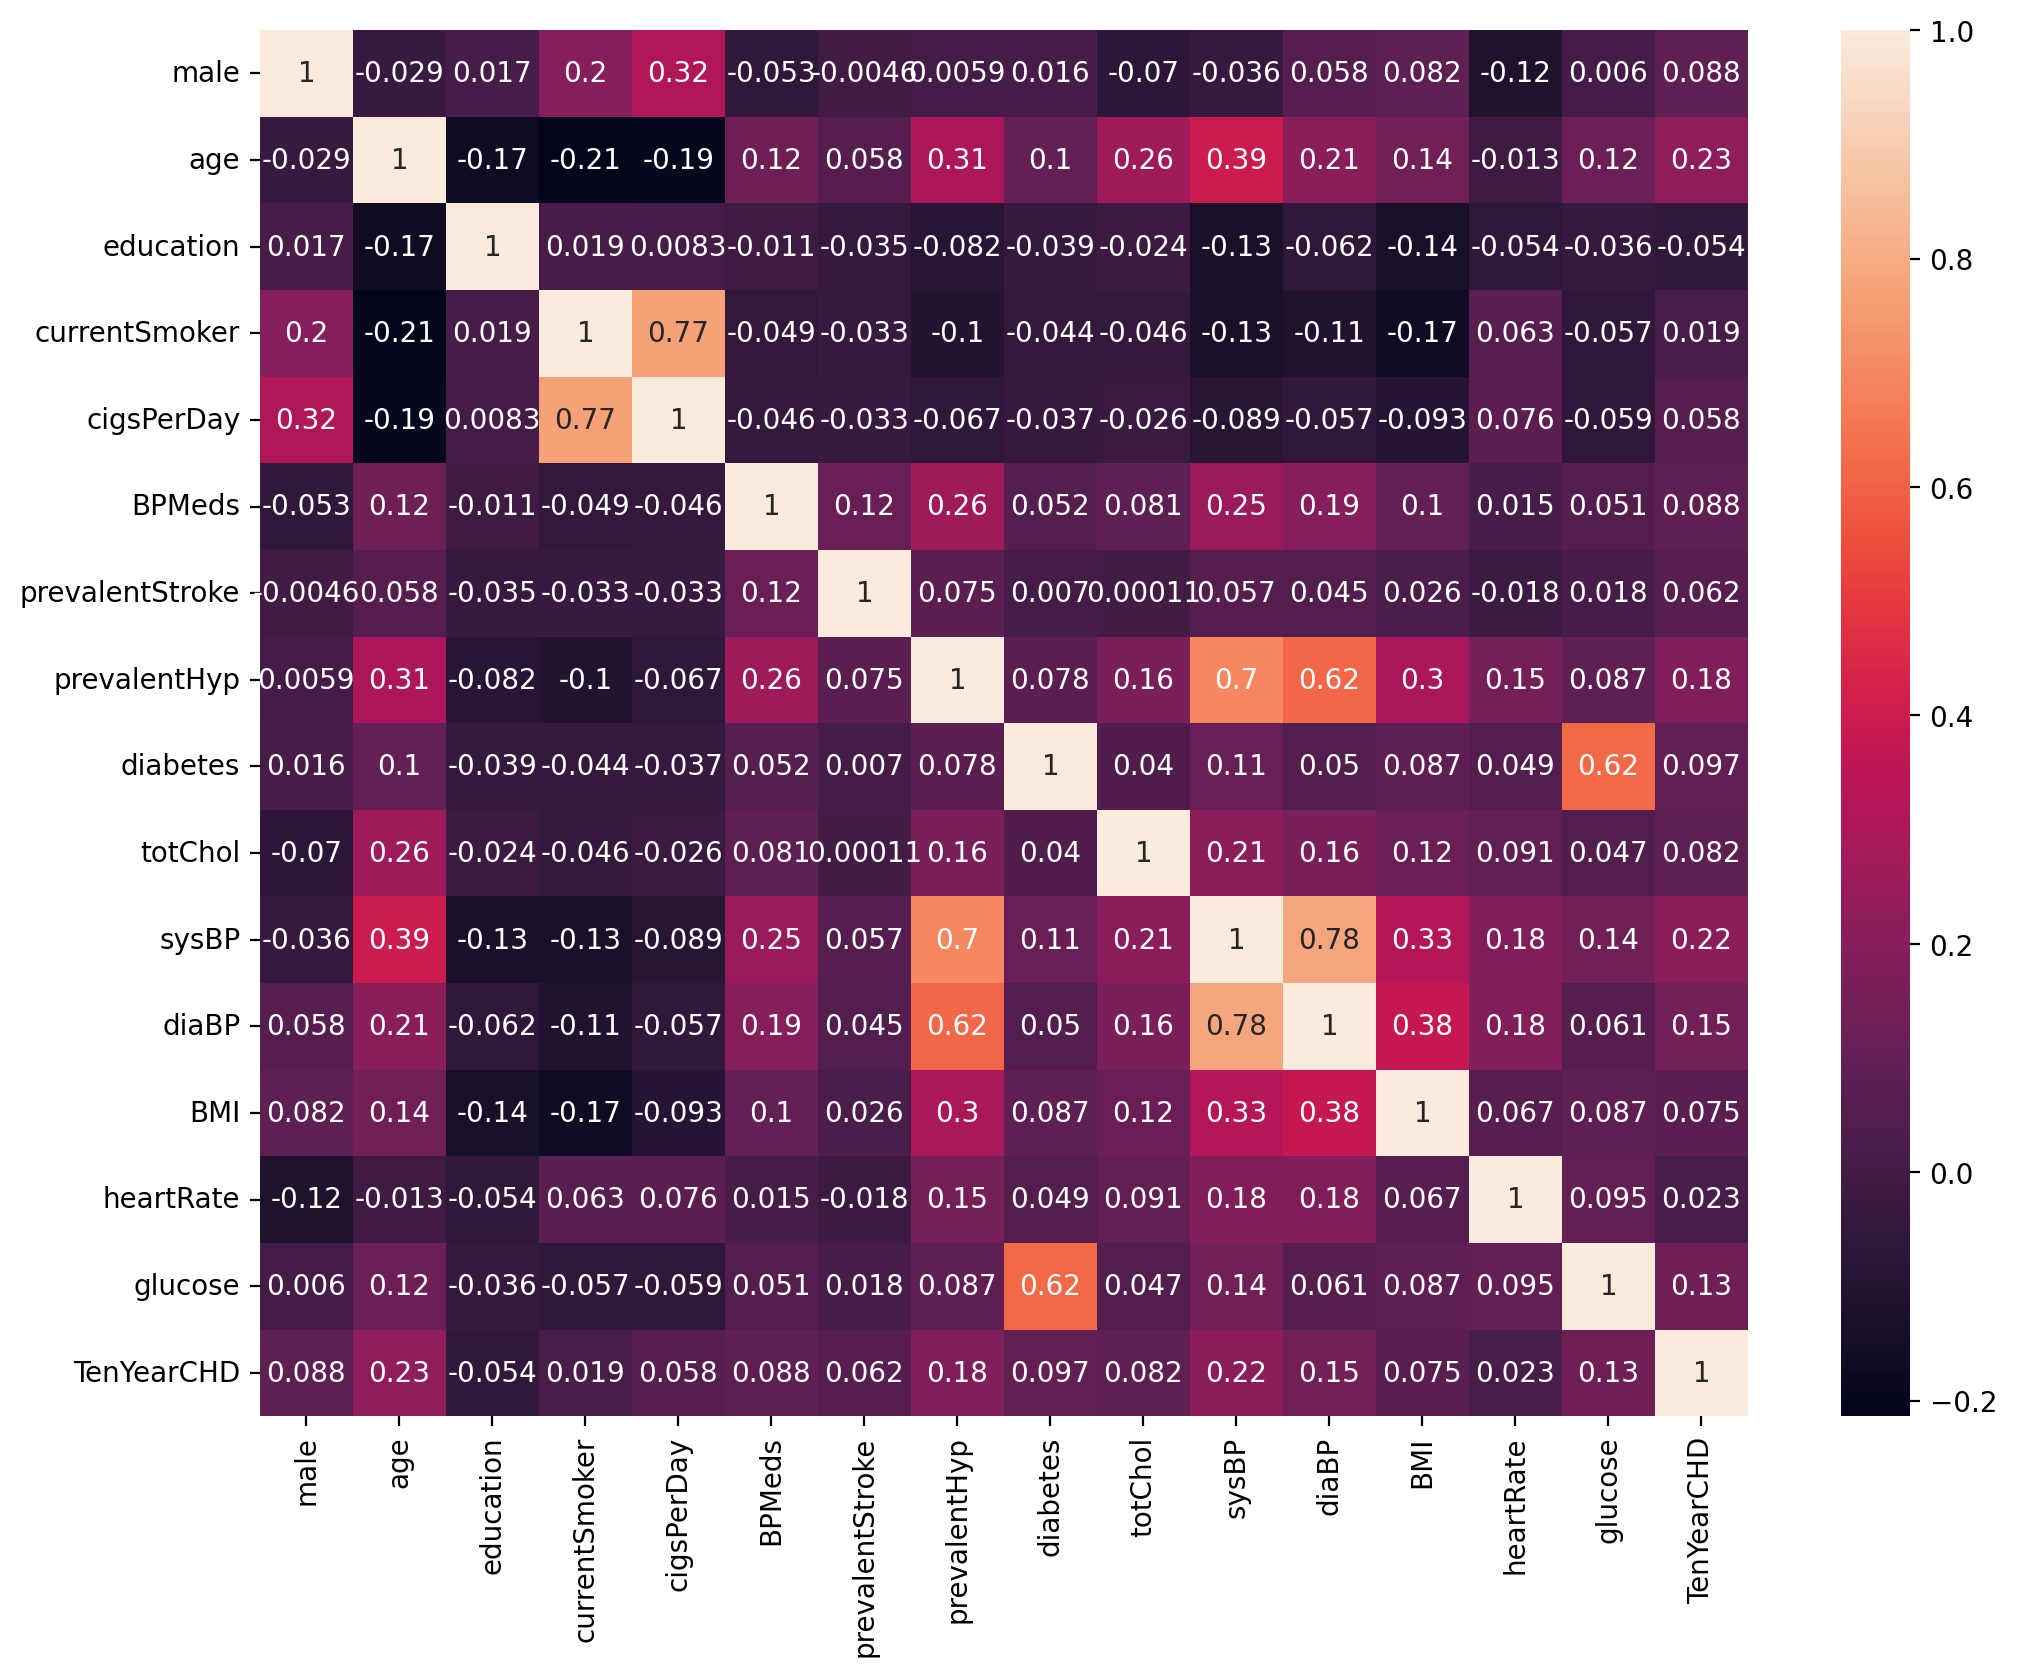

In [9]:
# features are correlated with each other 
df_corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(df_corr,annot=True)

##### Conclusions from Heatmap: We are dropping the column education because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice. The two features are not correlated to the outcome variable. In that case we would have kept them.

### Education parameter has the least correlation with the target parameter so we removed education parameter

In [10]:
df = df.drop(['education'], axis=1)

### Removing rows having missing data 

In [11]:
# Checking missing data 
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
df.columns

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Feature Selection

#### Feature Selection is the process used to select the input variables that are most important to your Machine Learning task. In a Supervised Learning task, your task is to predict an output variable and in some cases, you are limited with a few input variables to work with, but at times, you will have access to a whole lot of set of potential predictors or variables. In this case, it can often be harmful to use all of these input variables or predictors in to your model. This is where feature selection comes in.

### Identifying the features with the most importance for the outcome variable Heart Disease

In [13]:
# Identifying the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
11           BMI   17.108210


In [14]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs       Score
9             sysBP  667.109932
13          glucose  402.409837
1               age  297.974980
8           totChol  252.958627
3        cigsPerDay  185.115196
10            diaBP  142.920436
6      prevalentHyp   82.342164
7          diabetes   31.711253
4            BPMeds   26.116583
0              male   19.178560
11              BMI   17.108210
5   prevalentStroke    8.480982
12        heartRate    3.635480
2     currentSmoker    0.904429

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='Specs', ylabel='Score'>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, '\n Features')

Text(0, 0.5, 'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'sysBP'),
  Text(1, 0, 'glucose'),
  Text(2, 0, 'age'),
  Text(3, 0, 'totChol'),
  Text(4, 0, 'cigsPerDay'),
  Text(5, 0, 'diaBP'),
  Text(6, 0, 'prevalentHyp'),
  Text(7, 0, 'diabetes'),
  Text(8, 0, 'BPMeds'),
  Text(9, 0, 'male'),
  Text(10, 0, 'BMI'),
  Text(11, 0, 'prevalentStroke'),
  Text(12, 0, 'heartRate'),
  Text(13, 0, 'currentSmoker')])

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

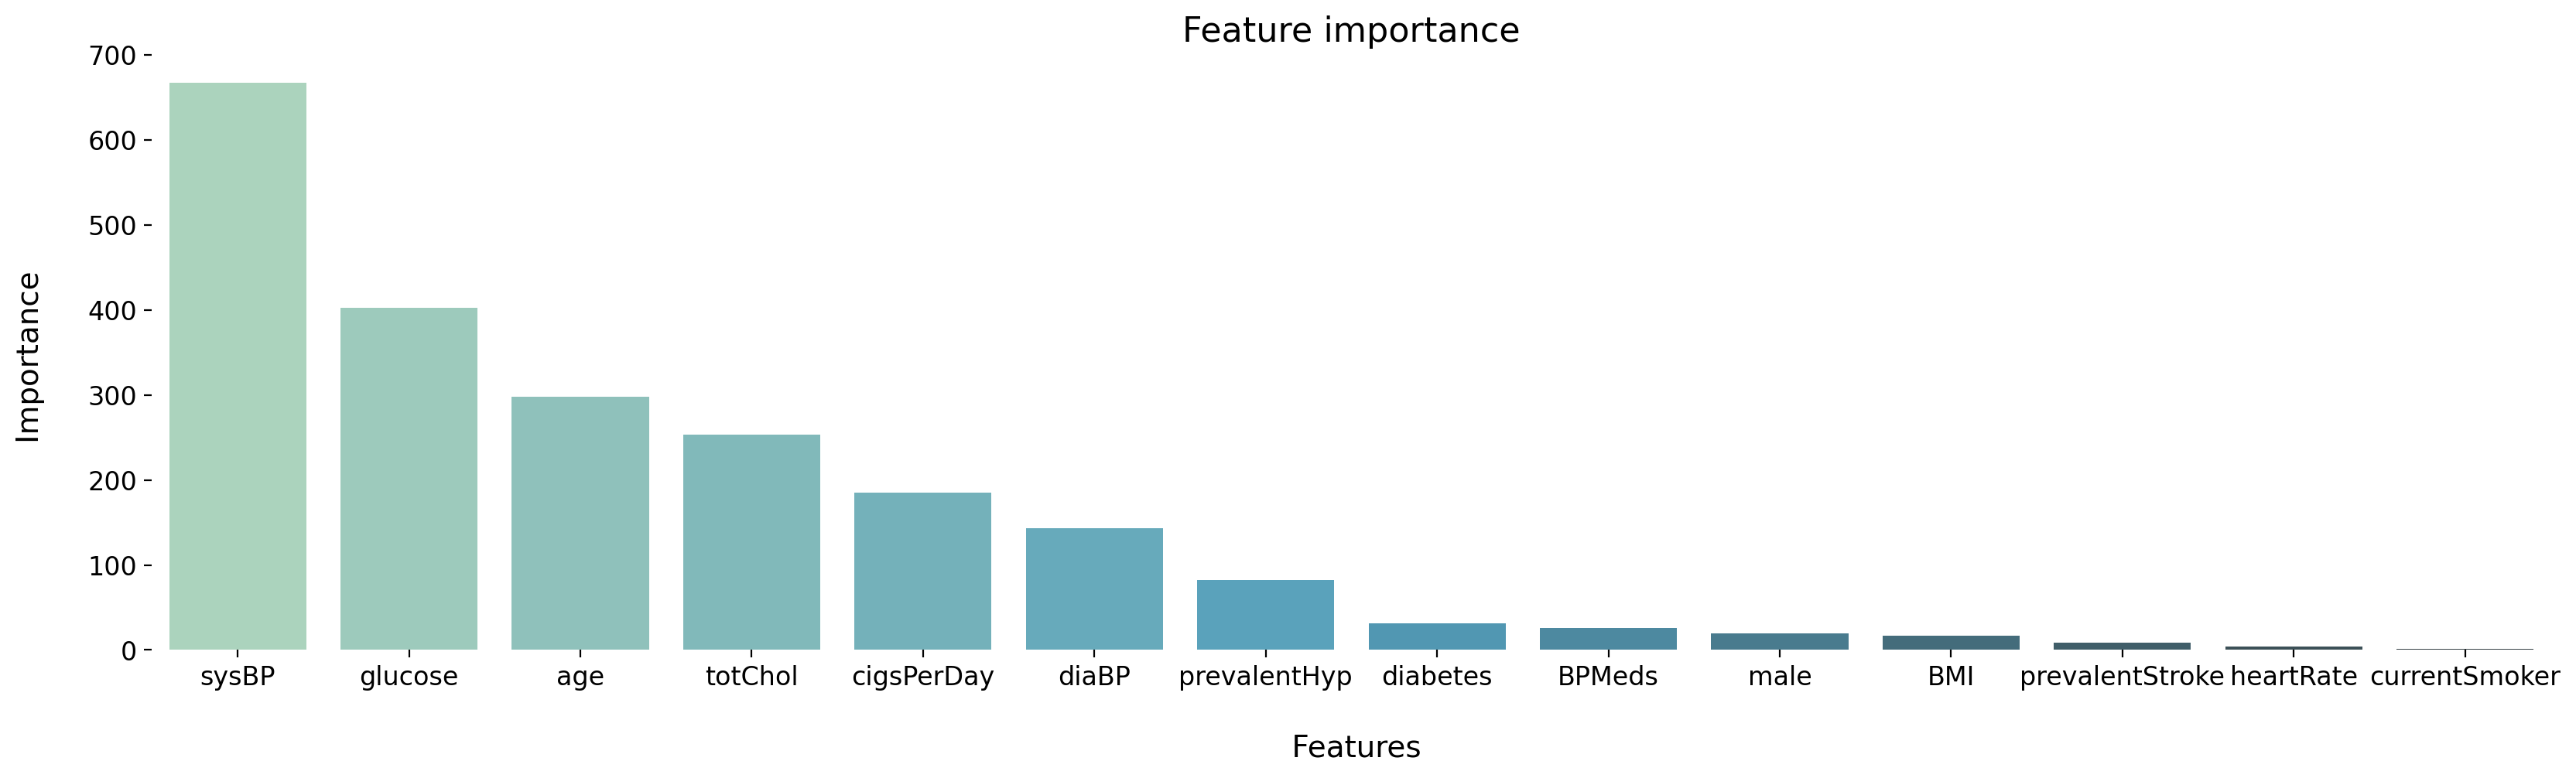

In [15]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Selecting the top 10 features having most importance  

#### We will only keep those features that have the strongest relationship with the output variable. These features are: Systolic Blood Pressure,Glucose,Age,Cholesterin,Cigarettes per Day,Diastolic Blood Pressure,Hypertensive,Diabetes,Blood Pressure Medication,Gender

In [16]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

### Creating new dataframe with selected features

In [17]:


df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

sysBP  glucose  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  \
0  106.0     77.0   39    195.0         0.0   70.0             0         0   
1  121.0     76.0   46    250.0         0.0   81.0             0         0   
2  127.5     70.0   48    245.0        20.0   80.0             0         0   
3  150.0    103.0   61    225.0        30.0   95.0             1         0   
4  130.0     85.0   46    285.0        23.0   84.0             0         0   

   BPMeds  male  TenYearCHD  
0     0.0     1           0  
1     0.0     0           0  
2     0.0     1           0  
3     0.0     0           1  
4     0.0     0           0

### Checking for outliers in the dataset 

#### An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error. The analysis of outlier data is referred to as outlier analysis or outlier mining.

#### Outliers in a dataset are data points that significantly deviate from the majority of the observations. They can be caused by errors in data collection, measurement variability, or rare events.

sysBP      glucose          age      totChol   cigsPerDay  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean    132.368435    81.880032    49.573447   236.928019     9.008531   
std      22.046522    23.882233     8.570204    44.611594    11.925097   
min      83.500000    40.000000    32.000000   113.000000     0.000000   
25%     117.000000    71.000000    42.000000   206.000000     0.000000   
50%     128.000000    78.000000    49.000000   234.000000     0.000000   
75%     144.000000    87.000000    56.000000   264.000000    20.000000   
max     295.000000   394.000000    70.000000   696.000000    70.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3751.000000   3751.000000  3751.000000  3751.000000  3751.000000   
mean     82.938550      0.311917     0.027193     0.030392     0.445215   
std      11.932779      0.463338     0.162666     0.171686     0.497056   
min      48.000000      0.000000     0.000000     0.000000     0.000000   
25%      75.000000      0.000000     0.000000     0.000000     0.000000   
50%      82.000000      0.000000     0.000000     0.000000     0.000000   
75%      90.000000      1.000000     0.000000     0.000000     1.000000   
max     142.500000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3751.000000  
mean      0.152493  
std       0.359546  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

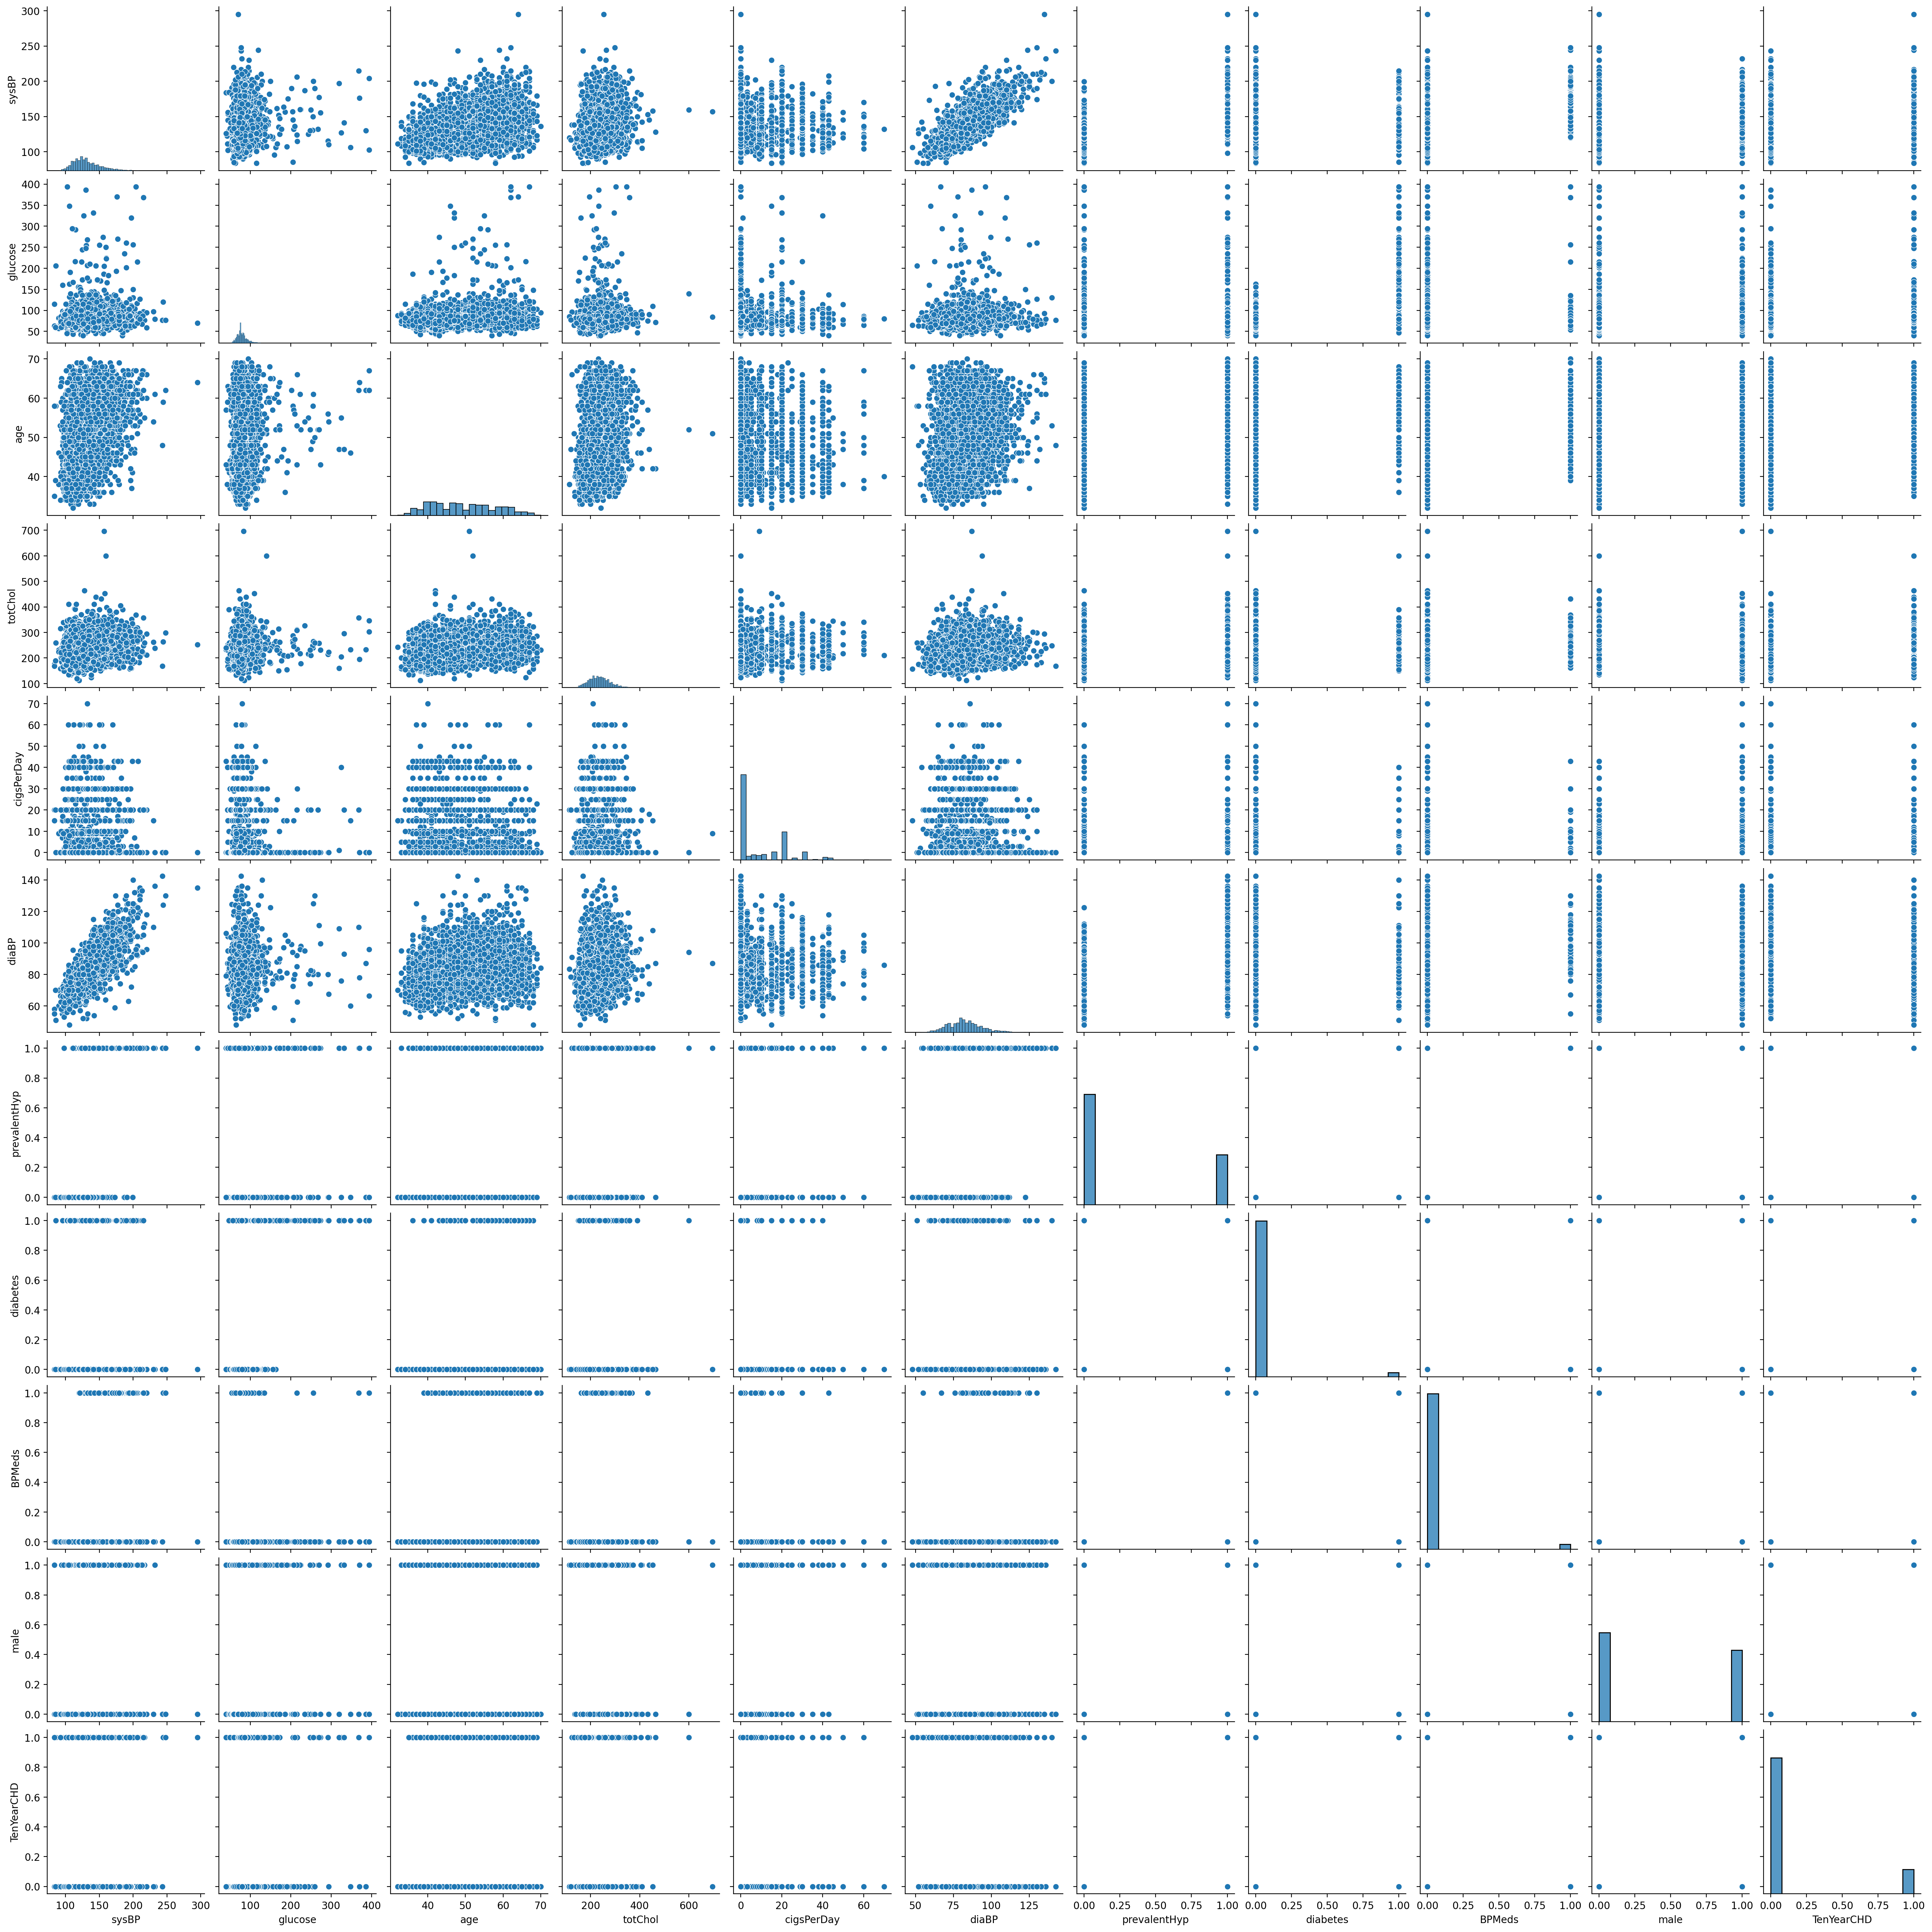

In [18]:

df.describe()
sns.pairplot(df)

### Cholestrin has some outliers so we are removing them here

<Axes: >

sysBP  glucose  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  \
1111  159.5    140.0   52    600.0         0.0   94.0             1         1   
3160  157.0     84.0   51    696.0         9.0   87.0             1         0   

      BPMeds  male  TenYearCHD  
1111     0.0     0           1  
3160     0.0     1           0

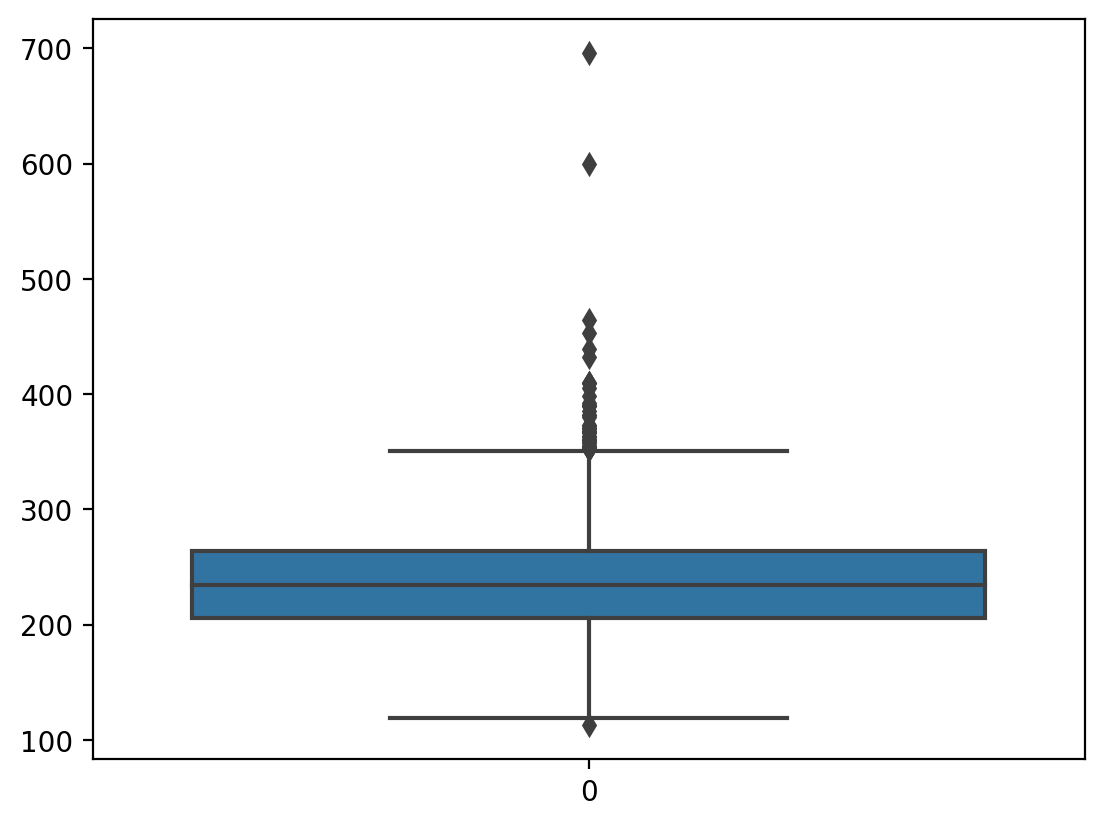

In [19]:
# Zooming into cholesterin outliers

sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

### Dropping 2 outliers in cholesterin

<Axes: >

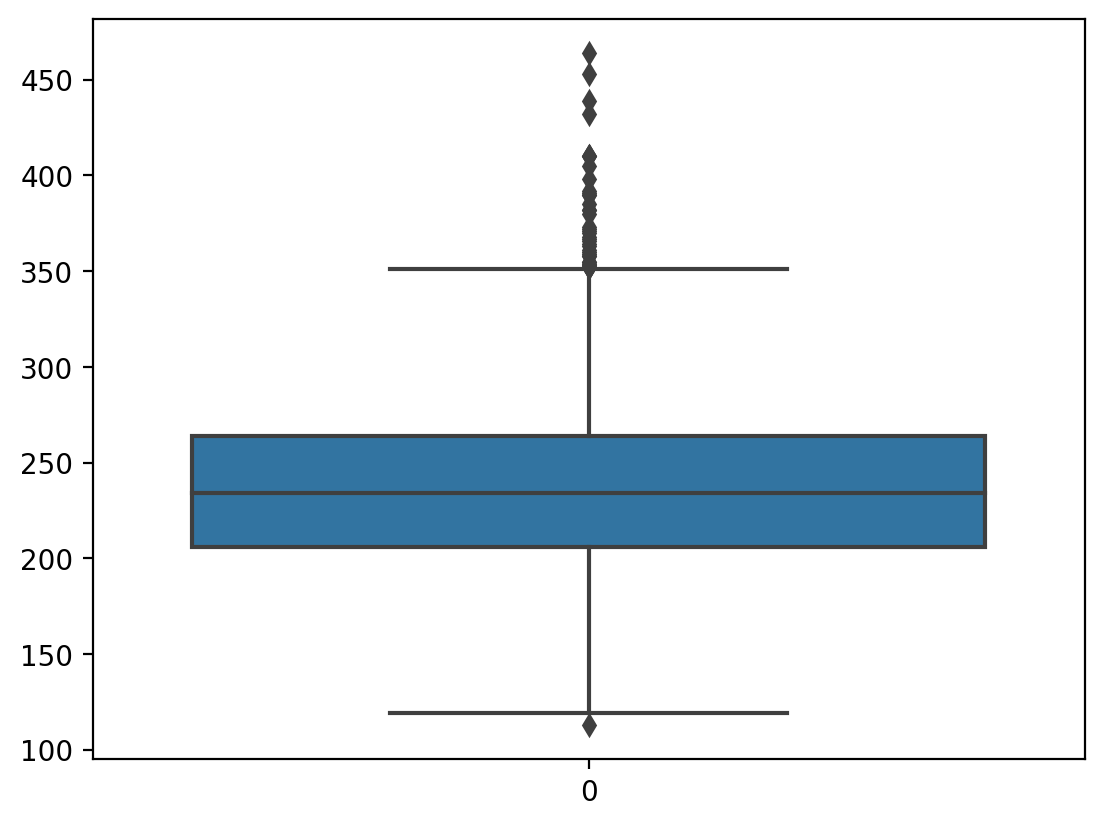

In [20]:

df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

In [21]:
df_clean = df

## Feature Scaling

#### Feature scaling is the process of normalising the range of features in a dataset.Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

### Here we are scaling our all features in range from 0 to 1

In [22]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [23]:
df_scaled.describe()
df.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  3749.000000  3749.000000  3749.000000  3749.000000  3749.000000   
mean      0.230991     0.118260     0.462432     0.352447     0.128728   
std       0.104228     0.067429     0.225589     0.124179     0.170391   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.158392     0.087571     0.263158     0.264957     0.000000   
50%       0.210402     0.107345     0.447368     0.344729     0.000000   
75%       0.283688     0.132768     0.631579     0.430199     0.285714   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3749.000000   3749.000000  3749.000000  3749.000000  3749.000000   
mean      0.369677      0.311550     0.026941     0.030408     0.445185   
std       0.126290      0.463189     0.161931     0.171730     0.497053   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.285714      0.000000     0.000000     0.000000     0.000000   
50%       0.359788      0.000000     0.000000     0.000000     0.000000   
75%       0.444444      1.000000     0.000000     0.000000     1.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3749.000000  
mean      0.152307  
std       0.359366  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

sysBP      glucose          age      totChol   cigsPerDay  \
count  3749.000000  3749.000000  3749.000000  3749.000000  3749.000000   
mean    132.354628    81.863964    49.572419   236.708722     9.010936   
std      22.044275    23.869703     8.572367    43.586786    11.927370   
min      83.500000    40.000000    32.000000   113.000000     0.000000   
25%     117.000000    71.000000    42.000000   206.000000     0.000000   
50%     128.000000    78.000000    49.000000   234.000000     0.000000   
75%     143.500000    87.000000    56.000000   264.000000    20.000000   
max     295.000000   394.000000    70.000000   464.000000    70.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3749.000000   3749.000000  3749.000000  3749.000000  3749.000000   
mean     82.934516      0.311550     0.026941     0.030408     0.445185   
std      11.934410      0.463189     0.161931     0.171730     0.497053   
min      48.000000      0.000000     0.000000     0.000000     0.000000   
25%      75.000000      0.000000     0.000000     0.000000     0.000000   
50%      82.000000      0.000000     0.000000     0.000000     0.000000   
75%      90.000000      1.000000     0.000000     0.000000     1.000000   
max     142.500000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3749.000000  
mean      0.152307  
std       0.359366  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

## Building the model

### Splitting The dataset for training and testing purpose for the machine learning model

In [24]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 20 % - 80 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=29)

In [25]:
len(X_train)
len(X_test)

749

3000

In [26]:
X_test.head()

sysBP   glucose       age   totChol  cigsPerDay     diaBP  \
1060  0.754137  0.104520  0.421053  0.159544    0.000000  1.000000   
3190  0.172577  0.158192  0.157895  0.447293    0.285714  0.285714   
1314  0.196217  0.098870  0.763158  0.179487    0.100000  0.359788   
881   0.205674  0.084746  0.552632  0.532764    0.142857  0.433862   
2352  0.059102  0.084746  0.210526  0.273504    0.142857  0.201058   

      prevalentHyp  diabetes  BPMeds  male  
1060           1.0       0.0     0.0   0.0  
3190           0.0       0.0     0.0   1.0  
1314           1.0       0.0     0.0   1.0  
881            0.0       0.0     0.0   0.0  
2352           0.0       0.0     0.0   0.0

## Resampling imbalanced Dataset 

### Checking the number of 0's and 1's in the target parameter

<Axes: >

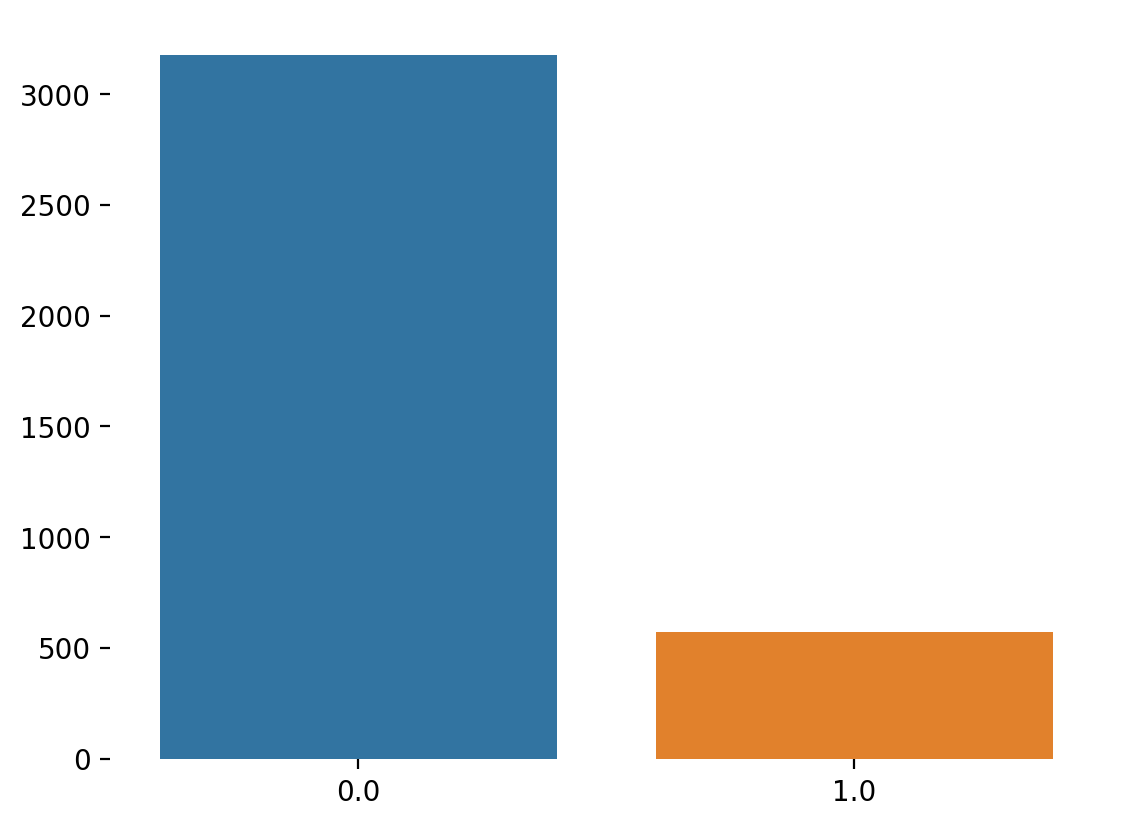

In [27]:
sns.barplot(x=df_scaled.TenYearCHD.value_counts().index, y = df_scaled.TenYearCHD.value_counts().values)
plt.box(False)

plt.show()

#### We can see that the proportion is 5.57:1 which is not well balanced. One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

## UNDERSAMPLING METHOD

#### Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.

### Here 0's are more so this can affect the performance of our model so we need to balance this values

In [28]:
shuffled_df = df_scaled.sample(frac=1,random_state=4)
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)
normalized_df = pd.concat([CHD_df, non_CHD_df])
normalized_df.TenYearCHD.value_counts()

0.0    611
1.0    571
Name: TenYearCHD, dtype: int64

### Now the 0 and 1 are about the same in number

<Axes: >

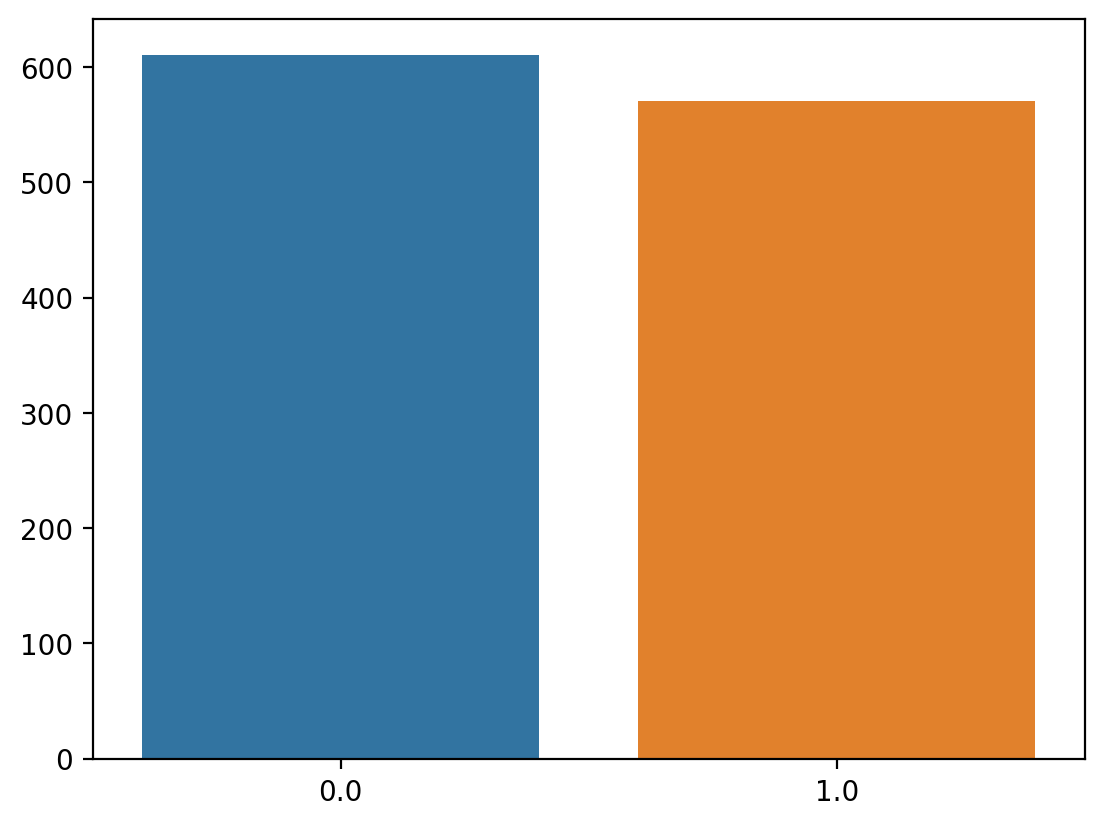

In [29]:
sns.barplot(x=normalized_df.TenYearCHD.value_counts().index, y = normalized_df.TenYearCHD.value_counts().values)

In [30]:
normalized_df


sysBP   glucose       age   totChol  cigsPerDay     diaBP  \
3122  0.262411  0.118644  0.684211  0.589744    0.000000  0.354497   
44    0.153664  0.098870  0.815789  0.188034    0.571429  0.222222   
2585  0.586288  0.121469  0.657895  0.484330    0.614286  0.740741   
2849  0.238771  0.090395  0.263158  0.609687    0.000000  0.476190   
922   0.290780  0.084746  0.342105  0.299145    0.042857  0.444444   
...        ...       ...       ...       ...         ...       ...   
996   0.167849  0.076271  0.552632  0.304843    0.614286  0.285714   
3024  0.234043  0.141243  0.315789  0.276353    0.000000  0.396825   
3688  0.598109  0.110169  0.578947  0.538462    0.000000  0.841270   
717   0.191489  0.073446  0.210526  0.572650    0.000000  0.407407   
3036  0.300236  0.087571  0.105263  0.310541    0.071429  0.486772   

      prevalentHyp  diabetes  BPMeds  male  TenYearCHD  
3122           1.0       0.0     0.0   1.0         1.0  
44             0.0       0.0     0.0   0.0         1.0  
2585           1.0       0.0     0.0   0.0         1.0  
2849           1.0       0.0     0.0   1.0         1.0  
922            1.0       0.0     0.0   1.0         1.0  
...            ...       ...     ...   ...         ...  
996            0.0       0.0     0.0   1.0         0.0  
3024           0.0       0.0     0.0   1.0         0.0  
3688           1.0       0.0     0.0   0.0         0.0  
717            0.0       0.0     0.0   0.0         0.0  
3036           1.0       0.0     0.0   0.0         0.0  

[1182 rows x 11 columns]

### Building the ML Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 300)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", 100*metrics.accuracy_score(y_test, y_pred))


RandomForestClassifier(n_estimators=300)


ACCURACY OF THE MODEL:  84.0


### Predicting the heart attack prediction using the input data from user

In [33]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = clf.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:


KeyboardInterrupt: Interrupted by user

### Importing Joblib

In [ ]:
from joblib import dump

### Dumping the model in One joblib file for using it our django project

In [ ]:
dump(clf,"./model.joblib")